In [1]:
import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
sns.set()

In [2]:
df = pd.read_csv("crx.csv")

In [3]:
df.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Gender             690 non-null object
Age                690 non-null object
Debt               690 non-null float64
Married            690 non-null object
BankCustomer       690 non-null object
EducationLevel     690 non-null object
Ethnicity          690 non-null object
YearsEmployed      690 non-null float64
PriorDefault       690 non-null object
Employed           690 non-null object
CreditScore        690 non-null int64
DriversLicense     690 non-null object
Citizen            690 non-null object
ZipCode            690 non-null object
Income             690 non-null int64
Approved           690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [5]:
df.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [6]:
for col in df:
    print('COLUMN :',col)
    print('# UNIQUE VALUES :',df[col].nunique())
    print('UNIQUE VALUES :',df[col].unique())

COLUMN : Gender
# UNIQUE VALUES : 3
UNIQUE VALUES : ['b' 'a' '?']
COLUMN : Age
# UNIQUE VALUES : 350
UNIQUE VALUES : ['30.83' '58.67' '24.5' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.5' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25' '47.75' '27.42' '41.17' '15.83' '47' '56.58' '57.42'
 '42.08' '29.25' '42' '49.5' '36.75' '22.58' '27.25' '23' '27.75' '54.58'
 '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41' '31.92' '41.5'
 '23.92' '25.75' '26' '37.42' '34.92' '34.25' '23.33' '23.17' '44.33'
 '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67' '36' '25.5'
 '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67' '34.08' '21.67'
 '21.5' '49.58' '27.67' '39.83' '?' '37.17' '25.67' '34' '49' '62.5'
 '31.42' '52.33' '28.75' '28.58' '22.5' '28.5' '37.5' '35.25' '18.67'
 '54.83' '40.92' '19.75' '29.17' '24.58' '33.75' '25.42' '37.75' '52.5'
 '57.83' '20.75' '39.92' '24.75' '44.17' '23.5' '47.67' '22.75' '34.42'
 '28.42' '67.75' '47.42' '

In [7]:
df=df.replace('?',np.nan)

In [8]:
df['Age']=pd.to_numeric(df['Age'])

In [9]:
df.isnull().sum()

Gender             12
Age                12
Debt                0
Married             6
BankCustomer        6
EducationLevel      9
Ethnicity           9
YearsEmployed       0
PriorDefault        0
Employed            0
CreditScore         0
DriversLicense      0
Citizen             0
ZipCode            13
Income              0
Approved            0
dtype: int64

In [10]:
objVar = [x for x in df.columns if x in df.loc[:,df.dtypes==np.object].columns]

for x in objVar:
    df[x] = df[x].fillna(df[x].mode().iloc[0])

nonobjVar = [x for x in df.columns if x not in df.loc[:,df.dtypes==np.object].columns]

for x in nonobjVar:
    df[x] = df[x].fillna(df[x].mean())

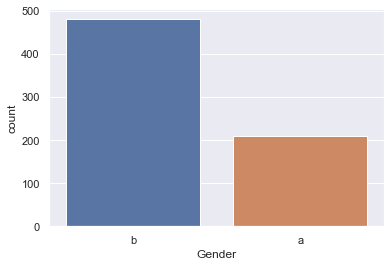

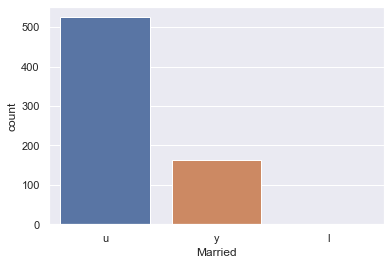

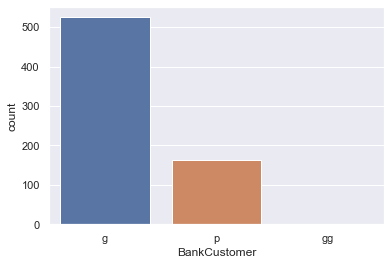

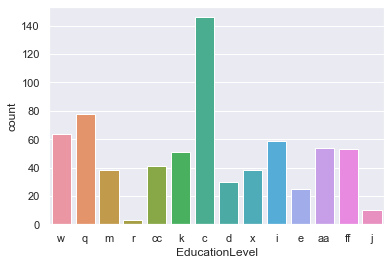

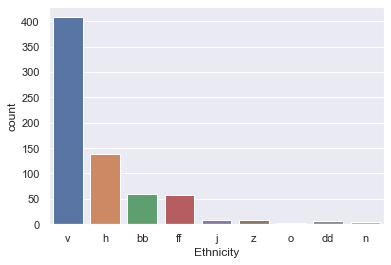

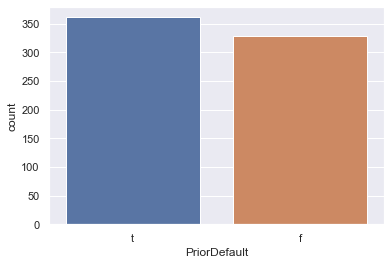

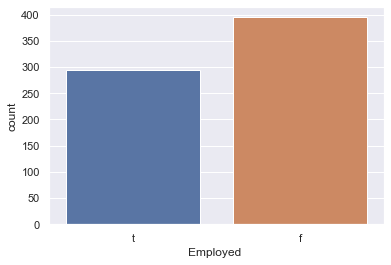

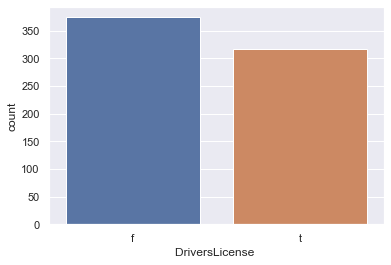

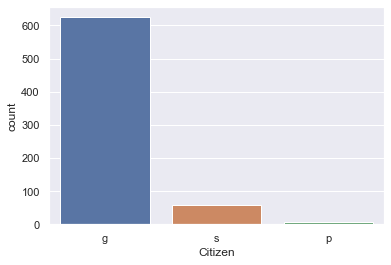

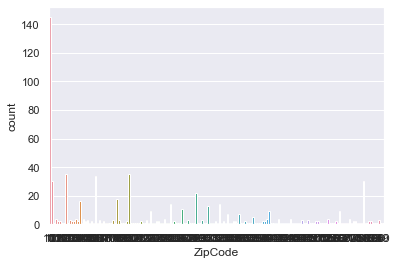

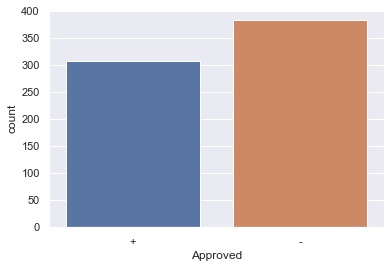

In [11]:
for i in objVar:
    sns.countplot(data=df,x=i)
    plt.show()

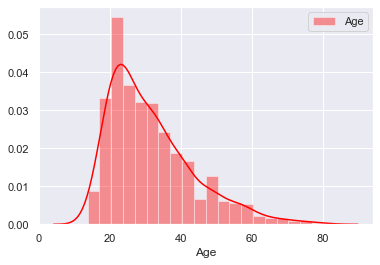

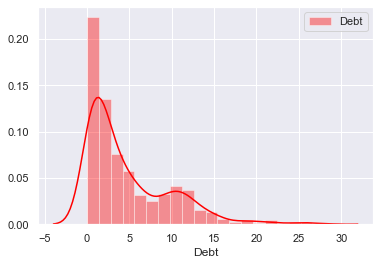

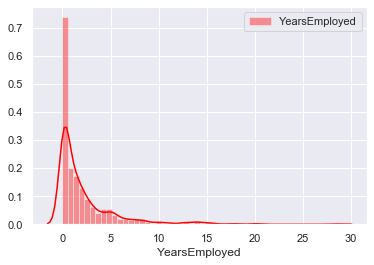

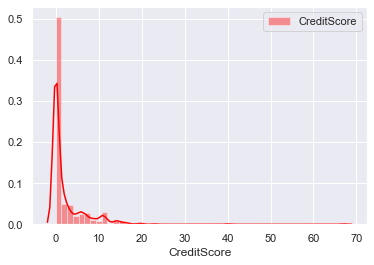

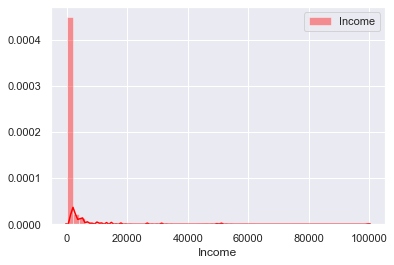

In [12]:
for i in nonobjVar:
    sns.distplot(df[i],color='red',label=i,kde=True)
    plt.legend()
    plt.show()

In [13]:
X = df.iloc[:, 0:15].values
Y = df.iloc[:, 15].values

In [14]:
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder(), [0,3,4,5,6,8,9,11,12])], remainder= 'passthrough')
labelencoder_x = LabelEncoder()
X[:,13] = labelencoder_x.fit_transform(X[:, 13])
X = np.array(ct.fit_transform(X))
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [16]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [17]:
clf = DecisionTreeClassifier(criterion = "gini")
clf.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
prediction=clf.predict(X_test)
print("Confusion Matrix: ",confusion_matrix(Y_test,prediction))
print("Report : ",classification_report(Y_test,prediction)) 
print ("Accuracy : ",accuracy_score(Y_test,prediction)*100) 

Confusion Matrix:  [[42 18]
 [18 60]]
Report :                precision    recall  f1-score   support

           0       0.70      0.70      0.70        60
           1       0.77      0.77      0.77        78

    accuracy                           0.74       138
   macro avg       0.73      0.73      0.73       138
weighted avg       0.74      0.74      0.74       138

Accuracy :  73.91304347826086


(0, 2)

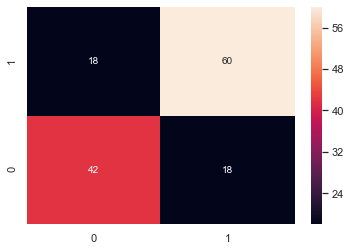

In [19]:
confusionMat = confusion_matrix(Y_test, prediction)
ax = sns.heatmap(confusionMat, annot=True)
ax.set_ylim([0,2])

In [20]:
clf = LogisticRegression(random_state = 0)
clf.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
prediction=clf.predict(X_test)
print("Confusion Matrix: ",confusion_matrix(Y_test,prediction))
print("Report : ",classification_report(Y_test,prediction)) 
print ("Accuracy : ",accuracy_score(Y_test,prediction)*100) 

Confusion Matrix:  [[47 13]
 [15 63]]
Report :                precision    recall  f1-score   support

           0       0.76      0.78      0.77        60
           1       0.83      0.81      0.82        78

    accuracy                           0.80       138
   macro avg       0.79      0.80      0.79       138
weighted avg       0.80      0.80      0.80       138

Accuracy :  79.71014492753623


(0, 2)

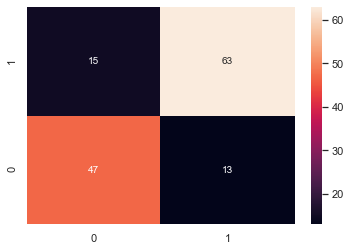

In [22]:
confusionMat = confusion_matrix(Y_test, prediction)
ax = sns.heatmap(confusionMat, annot=True)
ax.set_ylim([0,2])

In [23]:
#GRID SEARCH DT
params = [
{
'criterion': ['gini', 'entropy'], 
'max_depth': [3, 5, 7],
'min_samples_leaf': [1, 3, 5, 7]
}
]

clf = GridSearchCV(
DecisionTreeClassifier(),
params,
cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=0)
)
clf.fit(X_train, Y_train)
print("Best parameters set found on dev set: ", clf.best_params_)

Best parameters set found on dev set:  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1}


In [24]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth= 7, min_samples_leaf= 1,random_state=0)
clf.fit(X_train, Y_train)
prediction=clf.predict(X_test)
print("Confusion Matrix: ",confusion_matrix(Y_test,prediction))
print("Report : ",classification_report(Y_test,prediction)) 
print ("Accuracy : ",accuracy_score(Y_test,prediction)*100) 

Confusion Matrix:  [[49 11]
 [16 62]]
Report :                precision    recall  f1-score   support

           0       0.75      0.82      0.78        60
           1       0.85      0.79      0.82        78

    accuracy                           0.80       138
   macro avg       0.80      0.81      0.80       138
weighted avg       0.81      0.80      0.81       138

Accuracy :  80.43478260869566


In [25]:
#GRID SEARCH LOG REG
params =[ 
{'tol' : [0.01,0.001,0.0001],
'max_iter' : [100,150,200]
}
]

In [26]:
clf = GridSearchCV(LogisticRegression(), params,
cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=0))
clf.fit(X_train, Y_train)
print("Best parameters set found on dev set: ", clf.best_params_)

Best parameters set found on dev set:  {'max_iter': 100, 'tol': 0.001}


In [27]:
clf = LogisticRegression(max_iter=100,tol=0.001,random_state = 0)
clf.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)

In [28]:
prediction=clf.predict(X_test)
print("Confusion Matrix: ",confusion_matrix(Y_test,prediction))
print("Report : ",classification_report(Y_test,prediction)) 
print ("Accuracy : ",accuracy_score(Y_test,prediction)*100) 

Confusion Matrix:  [[47 13]
 [15 63]]
Report :                precision    recall  f1-score   support

           0       0.76      0.78      0.77        60
           1       0.83      0.81      0.82        78

    accuracy                           0.80       138
   macro avg       0.79      0.80      0.79       138
weighted avg       0.80      0.80      0.80       138

Accuracy :  79.71014492753623


(0, 2)

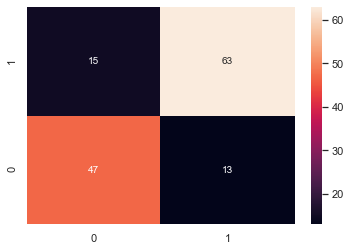

In [29]:
confusionMat = confusion_matrix(Y_test, prediction)
ax = sns.heatmap(confusionMat, annot=True)
ax.set_ylim([0,2])